In [1]:
import pandas as pd
#pd.set_option("display.max_rows", None, "display.max_columns", None)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
import statistics
import statsmodels.api as sm
from itertools import permutations
#import pdfkit as pdf

import seaborn as sns; sns.set(style="ticks", color_codes=True)
#iris = sns.load_dataset("iris")
#g = sns.pairplot(iris)

from Bio import SeqIO
import sys

import os
import glob

#%load_ext rpy2.ipython

In [91]:
# Lists of genes (exclude ND5 and ND6).
list_mt_original = ['MT-ATP8','MT-ATP6','MT-ND4L','MT-ND4','MT-ND1','MT-ND2','MT-ND3','MT-CO1','MT-CO2','MT-CO3','MT-CYB']
list_mt_bicistronic = ['MT-ATP8_MT-ATP6','MT-ND4L_MT-ND4','MT-ND1','MT-ND2','MT-ND3','MT-CO1','MT-CO2','MT-CO3','MT-CYB']

list_original = ['ATP8','ATP6','ND4L','ND4','ND1','ND2','ND3','CO1','CO2','CO3','CYB']
list_bicistronic = ['ATP8/6','ND4L/4','ND1','ND2','ND3','CO1','CO2','CO3','CYB']

In [3]:
# Dictionary containing alternate names for genes (without prefix 'MT-').
dict_gene_names = {
    'MT-ATP8_MT-ATP6':'ATP8/ATP6' , 'MT-ND4L_MT-ND4':'ND4L/ND4' , 'MT-ND1':'ND1' , 'MT-ND2':'ND2' , 'MT-ND3':'ND3' ,
    'MT-ND4':'ND4', 'MT-ND4L':'ND4L' , 'MT-ND5':'ND5' , 'MT-ND6':'ND6' , 'MT-CO1':'CO1' , 'MT-CO2':'CO2' , 
    'MT-CO3':'CO3' , 'MT-CYB':'CYB' , 'MT-ATP8':'ATP8' , 'MT-ATP6':'ATP6'
}

In [4]:
!ls ../data/transfer.2022-05-05/docker_out/bicistronic/
!ls ../data/transfer.2022-05-05/docker_out/original/

SRR1068855.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1071231.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1071594.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1071955.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1074359.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1074670.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1074719.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1077288.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1077805.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1080766.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1084369.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1085519.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1087825.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1088581.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1089424.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1089901.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1090265.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1094051.Aligned.sortedByCoor

SRR1068855.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1071231.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1071594.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1071955.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1074359.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1074670.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1074719.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1077288.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1077805.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1080766.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1084369.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1085519.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1087825.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1088581.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1089424.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1089901.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1090265.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct
SRR1092349.Aligned.sortedByCoor

In [5]:
!head ../data/transfer.2022-05-05/docker_out/original/SRR818901.Aligned.sortedByCoord.out.md.bam.gene_tpm.gct

#1.2
56200	1
Name	Description	TPM
ENSG00000223972.5	DDX11L1	0.000000
ENSG00000227232.5	WASH7P	2.471736
ENSG00000278267.1	MIR6859-1	0.000000
ENSG00000243485.5	MIR1302-2HG	0.034774
ENSG00000237613.2	FAM138A	0.000000
ENSG00000268020.3	OR4G4P	0.035850
ENSG00000240361.1	OR4G11P	0.128146


In [6]:
# Import the SRR IDs for the 'Original' directory.
ids_orig = pd.read_table("../data/transfer.2022-05-05/docker_out/ids.original.txt", header=None)
# Turn into a list.
ids_orig = ids_orig[0].tolist()
ids_orig

['SRR1068855',
 'SRR1071231',
 'SRR1071594',
 'SRR1071955',
 'SRR1074359',
 'SRR1074670',
 'SRR1074719',
 'SRR1077288',
 'SRR1077805',
 'SRR1080766',
 'SRR1084369',
 'SRR1085519',
 'SRR1087825',
 'SRR1088581',
 'SRR1089424',
 'SRR1089901',
 'SRR1090265',
 'SRR1092349',
 'SRR1094051',
 'SRR1095720',
 'SRR1096174',
 'SRR1096662',
 'SRR1098474',
 'SRR1102830',
 'SRR1105057',
 'SRR1309070',
 'SRR1313687',
 'SRR1320225',
 'SRR1327327',
 'SRR1337173',
 'SRR1349231',
 'SRR1351979',
 'SRR1353663',
 'SRR1355396',
 'SRR1365448',
 'SRR1367715',
 'SRR1368072',
 'SRR1375439',
 'SRR1375509',
 'SRR1376249',
 'SRR1377800',
 'SRR1381348',
 'SRR1383081',
 'SRR1383259',
 'SRR1385277',
 'SRR1390027',
 'SRR1394231',
 'SRR1396786',
 'SRR1401839',
 'SRR1409263',
 'SRR1415773',
 'SRR1417483',
 'SRR1418880',
 'SRR1429265',
 'SRR1431083',
 'SRR1435248',
 'SRR1436563',
 'SRR1448029',
 'SRR1453416',
 'SRR1459125',
 'SRR1475300',
 'SRR1481396',
 'SRR1486156',
 'SRR1486799',
 'SRR598044',
 'SRR598452',
 'SRR600656'

In [7]:
def join_tpm(version):
   
    # Use glob to get all the TPM (.gct) files in the directory
    # in the folder
    path = "../data/transfer.2022-05-05/docker_out/"+version
    csv_files = glob.glob(os.path.join(path, "*.gct"))
    
    for SRR in ids_orig:
        # Get the file name for this SRR.
        for DIR in csv_files:
            if DIR.find(SRR)!= -1:
                dir_file = DIR                
        # Import the TPM file.
        df_in = pd.read_table( dir_file , skiprows=2 )
        # Change name of TPM column to the SRR id.
        df_in.columns = df_in.columns.str.replace('TPM', SRR)
        # The first SRR becomes the df that will be used to merge.
        if SRR == ids_orig[0]:
            df_out = df_in
        if SRR != ids_orig[0]:
            df_out = pd.merge(df_out,df_in)
    return df_out


df_original = join_tpm("original")
df_bicistronic = join_tpm("bicistronic")

In [8]:
df_original

,Name,Description,SRR1068855,SRR1071231,SRR1071594,SRR1071955,SRR1074359,SRR1074670,SRR1074719,SRR1077288,...,SRR816226,SRR816382,SRR817282,SRR817421,SRR818600,SRR818773,SRR818901,SRR819054,SRR819261,SRR820907
0,ENSG00000223972.5,DDX11L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.014813,0.031360,0.000000,...,0.000000,0.046128,0.034775,0.024491,0.000000,0.000000,0.000000,0.000000,0.052979,0.000000
1,ENSG00000227232.5,WASH7P,1.101757,1.296320,2.170081,0.972705,1.770108,1.909296,1.497086,4.179860,...,4.014505,1.221158,0.498026,2.024764,1.412439,2.219837,2.471736,1.528127,2.017553,0.685897
2,ENSG00000278267.1,MIR6859-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000243485.5,MIR1302-2HG,0.000000,0.038229,0.047540,0.000000,0.052201,0.059149,0.062612,0.047131,...,0.031409,0.061398,0.115715,0.024448,0.026096,0.060787,0.034774,0.029292,0.026444,0.000000
4,ENSG00000237613.2,FAM138A,0.017395,0.000000,0.000000,0.024084,0.037084,0.000000,0.014827,0.000000,...,0.000000,0.021809,0.049323,0.034737,0.037078,0.043184,0.000000,0.062429,0.018786,0.013343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56195,ENSG00000198695.2,MT-ND6,9336.503932,19093.158672,14593.858486,10157.868701,13709.941452,18707.759651,26507.086232,12032.526002,...,1904.903000,4616.001590,25577.644375,11084.502273,23226.797748,6797.969217,13083.971083,16223.950343,18395.928982,15279.955406
56196,ENSG00000210194.1,MT-TE,32.575526,46.540353,35.799604,31.485393,33.413013,72.751689,85.654595,41.998151,...,7.884150,18.108762,111.246320,42.958355,82.863068,30.898483,40.588916,60.292364,71.023480,38.895893
56197,ENSG00000198727.2,MT-CYB,22351.909552,34457.481449,32202.196950,27959.676014,29733.835083,37556.653909,38823.651486,21297.579023,...,20159.011147,32376.491009,32154.386350,44675.624843,29113.616417,30329.669731,25918.854294,29745.491151,33534.869458,38579.587301
56198,ENSG00000210195.2,MT-TT,0.963856,0.501606,0.000000,0.000000,0.000000,1.552216,1.369235,0.618411,...,1.236378,0.402806,1.214652,2.245550,3.766503,1.595208,0.456278,1.153041,1.040913,1.232239


In [9]:
df_bicistronic

,Name,Description,SRR1068855,SRR1071231,SRR1071594,SRR1071955,SRR1074359,SRR1074670,SRR1074719,SRR1077288,...,SRR816226,SRR816382,SRR817282,SRR817421,SRR818600,SRR818773,SRR818901,SRR819054,SRR819261,SRR820907
0,ENSG00000223972.5,DDX11L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.015583,0.033724,0.000000,...,0.000000,0.048346,0.036534,0.025863,0.000000,0.000000,0.000000,0.000000,0.055670,0.055670
1,ENSG00000227232.5,WASH7P,1.151978,1.369402,2.283569,1.017491,1.849906,2.008557,1.609924,4.302812,...,4.129429,1.279875,0.523223,2.138219,1.476783,2.325981,2.584451,2.584451,2.120021,2.120021
2,ENSG00000278267.1,MIR6859-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000243485.5,MIR1302-2HG,0.000000,0.040384,0.050026,0.000000,0.054554,0.062224,0.067331,0.048517,...,0.032308,0.064350,0.121569,0.025818,0.027285,0.063694,0.036360,0.036360,0.027787,0.027787
4,ENSG00000237613.2,FAM138A,0.018188,0.000000,0.000000,0.025193,0.038756,0.000000,0.015944,0.000000,...,0.000000,0.022858,0.051819,0.036684,0.038767,0.045249,0.000000,0.000000,0.019740,0.019740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56193,ENSG00000198727.2,MT-CYB,23370.780620,36400.054698,33886.263277,29247.029259,31074.265896,39509.172207,41749.862835,21924.054456,...,20736.110187,33933.262850,33781.196549,47178.978013,30439.905358,31779.908831,27100.798966,27100.798966,35238.042549,35238.042549
56194,ENSG00000210195.2,MT-TT,1.007791,0.529885,0.000000,0.000000,0.000000,1.632914,1.472437,0.636601,...,1.271772,0.422174,1.276106,2.371378,3.938088,1.671484,0.477085,0.477085,1.093779,1.093779
56195,ENSG00000210196.2,MT-TP,3.586551,5.143001,2.548387,2.709683,2.779045,5.547103,5.430694,4.325145,...,2.880190,4.097575,6.812155,2.959240,9.729395,2.839065,3.241373,3.241373,2.830958,2.830958
56196,ENSG111111111.2,MT-ATP8_MT-ATP6,45234.915777,59901.663684,51313.191966,48565.826785,47494.084477,46323.281146,78093.534899,31216.361983,...,29922.249504,46281.357732,46670.464176,48610.982335,44545.456110,39542.885603,41695.903957,41695.903957,46288.309687,46288.309687


### Export the multi-sample TPM files.

In [46]:
#df_original.to_csv("../results/docker.original.2022-05-05.gct")

In [47]:
#df_bicistronic.to_csv("../results/docker.bicistronic.2022-05-05.gct")

## Get the SRR id to GTEx id information (from SRA Run Selector metadata).

In [12]:
df_id = pd.read_csv("../data/RunSelector_MetaData_GTEx.txt")
# Select SRR and short GTEx ID columns.
df_id = df_id[["Run","submitted_subject_id","biospecimen_repository_sample_id"]]
# Change column names.
df_id.columns = ['SRR_ID','short_ID',"GTEX_ID"]
df_id

/Users/edmundo/miniconda3/envs/ejt_works2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (37,55,56,57,58,65,66,67,68,69,70,71,75,76,77) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SRR_ID,short_ID,GTEX_ID
0,SRR8176157,GTEX-1117F,GTEX-1117F-0226-SM-5GZZ7
1,SRR8176158,GTEX-1117F,GTEX-1117F-0426-SM-5EGHI
2,SRR8176159,GTEX-1117F,GTEX-1117F-0003-SM-6WBT7
3,SRR8176160,GTEX-111CU,GTEX-111CU-0003-SM-6WBUD
4,SRR3478694,GTEX-14E7W,GTEX-14E7W-0001-SM-7DROS
...,...,...,...
24450,SRR665442,GTEX-P44H,GTEX-P44H-2626-SM-2XCET
24451,SRR665514,GTEX-SNMC,GTEX-SNMC-0126-SM-2XCFO
24452,SRR665563,GTEX-QMR6,GTEX-QMR6-0011-R7A-SM-32PKL
24453,SRR665586,GTEX-TSE9,GTEX-TSE9-0226-SM-3DB84


## Get the info (Population, mtdna haplogroup, Tissue).

In [13]:
df_info = pd.read_table("../data/secure/phenotypes_v8.txt")
# Change column names.
df_info.columns = ['GTEX_ID','short_ID','Population','mtDNA_haplo','Tissue']
# Change 2 to AfAm, and 3 to EuAm.
df_info['Population'] = [ {3:'EuAm',2:'AfAm'}[row] for row in df_info['Population'] ]
df_info

,GTEX_ID,short_ID,Population,mtDNA_haplo,Tissue
0,GTEX-1117F-0003-SM-58Q7G,GTEX-1117F,AfAm,L,Whole Blood
1,GTEX-1117F-0003-SM-5DWSB,GTEX-1117F,AfAm,L,Whole Blood
2,GTEX-1117F-0003-SM-6WBT7,GTEX-1117F,AfAm,L,Whole Blood
3,GTEX-1117F-0011-R10a-SM-AHZ7F,GTEX-1117F,AfAm,L,Brain - Frontal Cortex (BA9)
4,GTEX-1117F-0011-R10b-SM-CYKQ8,GTEX-1117F,AfAm,L,Brain - Frontal Cortex (BA9)
...,...,...,...,...,...
22182,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU,EuAm,H,Ovary
22183,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU,EuAm,H,Vagina
22184,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU,EuAm,H,Artery - Tibial
22185,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU,EuAm,H,Muscle - Skeletal


## Keep only mtDNA genes, wrangle, and add annotations.

In [63]:
def keep_mtdna(df):
    # Keep only genes that start with 'MT-'.
    return df[df['Description'].str.contains("MT-")]

def melt_SRR(df):
    df_mt = keep_mtdna(df)
    # Melt TPM columns to form SRR column.
    # List of SRR columns.
    #return list(df_mt.columns)[2:]
    df_melt = df_mt.melt(id_vars='Description',
                value_vars=list(df_mt.columns)[2:] ,
                #value_vars=['MT-ND1','MT-ND2','MT-CO1','MT-CO2','MT-CO3','MT-ND3','MT-CYB','MT-ND5','MT-ND6'],
                var_name=['SRR_ID'], value_name='TPM')
    return df_melt

def add_gtexid(df):
    df_melt = melt_SRR(df)
    # Merge short GTEX ID using SRR column.
    return pd.merge(df_id,df_melt)

def add_info(df):
    df_melt_id = add_gtexid(df)
    # Change name of 'Description' column to 'Gene'.
    df_melt_id.columns = df_melt_id.columns.str.replace('Description','Gene')
    # Annotate with race, mtdna haplogroup, tissue.
    df_melt_id_info = pd.merge(df_melt_id,df_info)
    # Drop non-Skeletal Muscle samples (e.g. Testis).
    return df_melt_id_info[df_melt_id_info['Tissue']=='Muscle - Skeletal']


#keep_mtdna(df_original)
#melt_SRR(df_original)
#add_gtexid(df_original)
df_original_info = add_info(df_original)#['Tissue'].value_counts()
df_bicistronic_info = add_info(df_bicistronic)

In [64]:
df_original_info#[['GTEX_ID','Population']].drop_duplicates()['Population'].value_counts()

,SRR_ID,short_ID,GTEX_ID,Gene,TPM,Population,mtDNA_haplo,Tissue
0,SRR627431,GTEX-O5YV,GTEX-O5YV-2026-SM-26GMK,MT-TF,17.340462,EuAm,H,Muscle - Skeletal
1,SRR627431,GTEX-O5YV,GTEX-O5YV-2026-SM-26GMK,MT-RNR1,26915.726998,EuAm,H,Muscle - Skeletal
2,SRR627431,GTEX-O5YV,GTEX-O5YV-2026-SM-26GMK,MT-TV,14.019566,EuAm,H,Muscle - Skeletal
3,SRR627431,GTEX-O5YV,GTEX-O5YV-2026-SM-26GMK,MT-RNR2,91136.965119,EuAm,H,Muscle - Skeletal
4,SRR627431,GTEX-O5YV,GTEX-O5YV-2026-SM-26GMK,MT-TL1,111.391824,EuAm,H,Muscle - Skeletal
...,...,...,...,...,...,...,...,...
5989,SRR660709,GTEX-P44H,GTEX-P44H-0426-SM-2XCEZ,MT-ND6,16691.860876,EuAm,H,Muscle - Skeletal
5990,SRR660709,GTEX-P44H,GTEX-P44H-0426-SM-2XCEZ,MT-TE,159.574301,EuAm,H,Muscle - Skeletal
5991,SRR660709,GTEX-P44H,GTEX-P44H-0426-SM-2XCEZ,MT-CYB,37731.712858,EuAm,H,Muscle - Skeletal
5992,SRR660709,GTEX-P44H,GTEX-P44H-0426-SM-2XCEZ,MT-TT,3.499881,EuAm,H,Muscle - Skeletal


In [65]:
df_bicistronic_info[['short_ID','Population']].drop_duplicates()['Population'].value_counts()

EuAm    102
AfAm     55
Name: Population, dtype: int64

### Export the multi-sample TPM files (with annotations).

In [68]:
#df_original_info.to_csv("../results/docker.original.2022-05-18.annot.txt")

In [69]:
#df_bicistronic_info.to_csv("../results/docker.bicistronic.2022-05-18.annot.txt")

# Plot expression by population.

In [70]:
def boxplot_genes(df):
    # Change mtdna gene names.
    df['Gene'] = [ dict_gene_names[gene] for gene in df['Gene'] ]
    # Change population names.
    df['Population'] = [ {'AfAm':'African Americans','EuAm':'European Americans'}[x] for x in df['Population'] ]
    # Size of plot and text.
    sns.set(rc={'figure.figsize':(30,15)},font_scale=2.5)
    # Style of plot.
    sns.set_style("ticks")
    # Create boxplot.
    sns.boxplot(data=df.sort_values(['Gene']) ,
               x='Gene' ,
               y='TPM',
               hue='Population',
               hue_order=['African Americans','European Americans'],
               palette="Blues_r"
               )
    plt.xlabel('\nGene')
    plt.ylabel('Normalized gene expression (TPM)')
    plt.xticks(rotation=0, fontstyle='italic')
    plt.legend()
    
#boxplot_genes( df_original_info[df_original_info['Gene'].isin(['MT-ND4','MT-ND4L','MT-ATP8','MT-ATP6'])] )

/Users/edmundo/miniconda3/envs/ejt_works2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/edmundo/miniconda3/envs/ejt_works2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


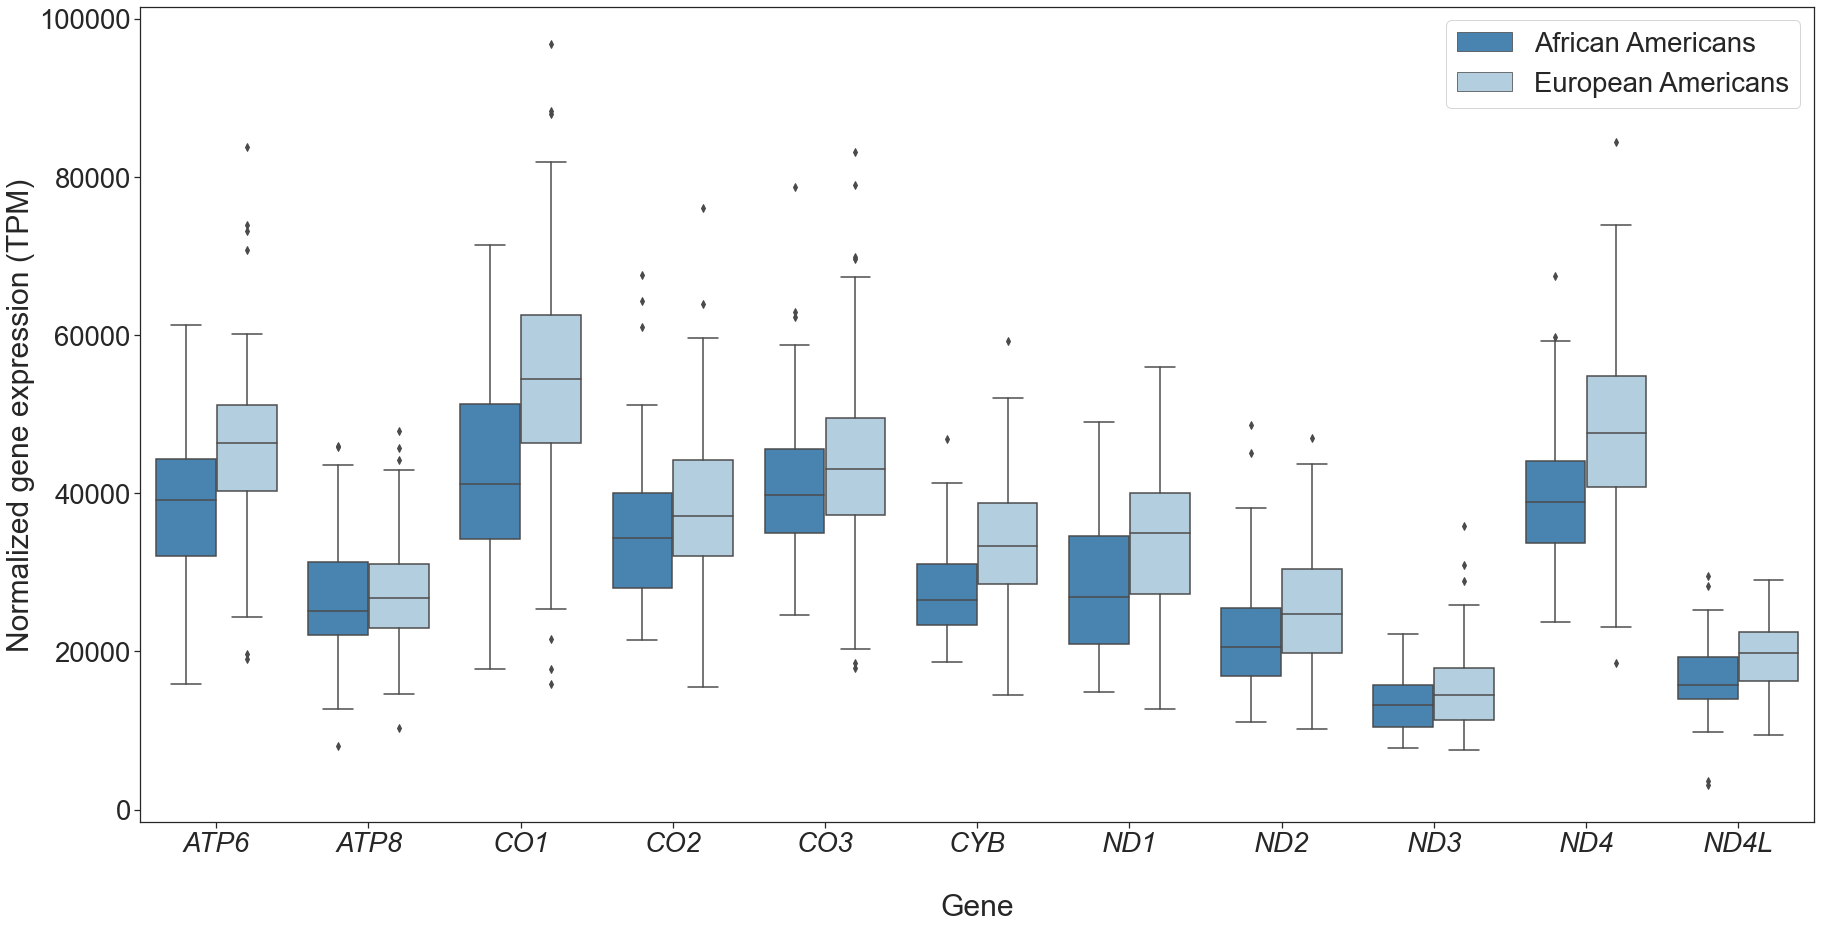

In [71]:
boxplot_genes( df_original_info[df_original_info['Gene'].isin(list_mt_original)] )

/Users/edmundo/miniconda3/envs/ejt_works2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/edmundo/miniconda3/envs/ejt_works2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


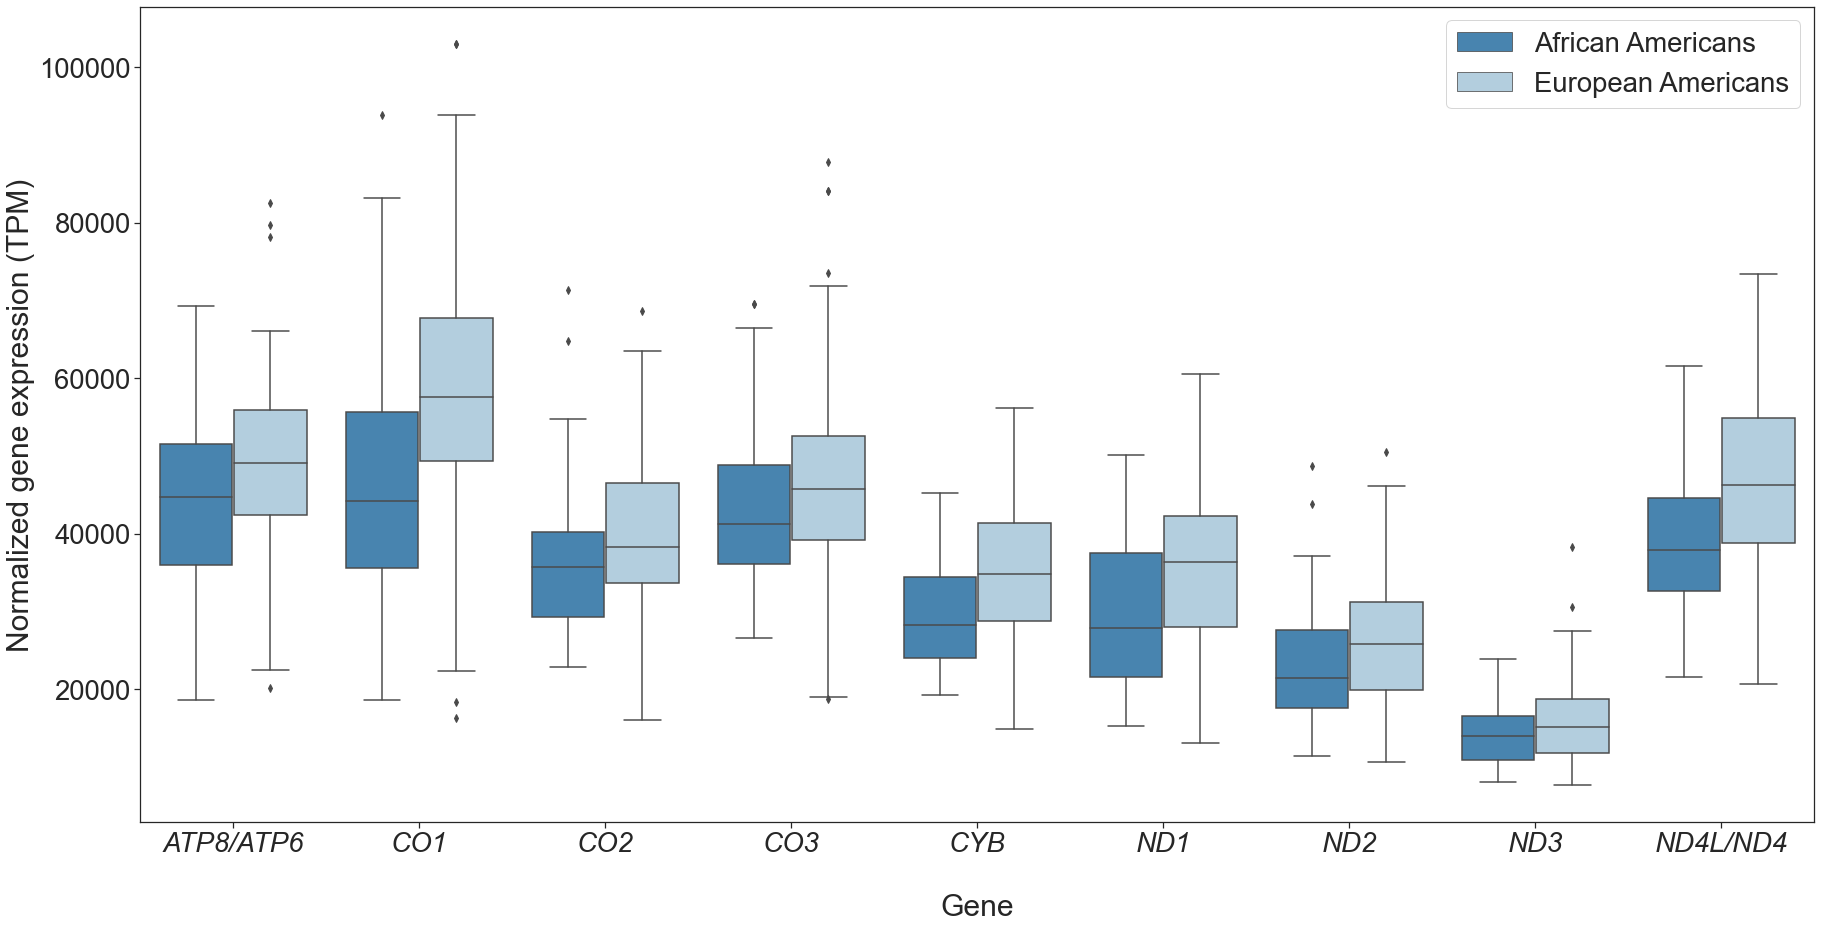

In [72]:
boxplot_genes( df_bicistronic_info[df_bicistronic_info['Gene'].isin(list_mt_bicistronic)] )

## Two sample t-test.

In [73]:
# This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. 
# This test assumes that the populations have identical variances by default.
## Apparently no minimum sample size, but power is severely limited.

def ttest_test(df,gene):
    data = df[df['Gene']==gene]
    data_euam = data[data['Population']=='EuAm']
    data_afam = data[data['Population']=='AfAm']
    #return(data_euam)
    results = stats.ttest_ind( data_euam['TPM'] , data_afam['TPM'] , alternative='greater')
    return(results)

# Get MWU results for a list of genes.
def table_ttest_test(df,list_genes):
    # Empty table.
    table = pd.DataFrame({'Gene':[],'Statistic':[],'P-value':[]})
    for gene in list_genes:
        # Get statistic and p-value from t-test.
        results = ttest_test(df,gene)
        # Put into pd df format.
        new_row = pd.DataFrame({'Gene':[gene],'Statistic':[results.statistic],'P-value':[results.pvalue]})
        # Concatenate at end of table.
        table = pd.concat([table, new_row ])
    # Bonferroni correction by number of transcripts.
    table['Bonferroni P-value'] = table['P-value']*len(list_genes)
    # Change mtdna gene names.
    table['Gene'] = [ dict_gene_names[gene] for gene in table['Gene'] ]
    return table

In [74]:
table_ttest_test(df_original_info,list_mt_original)

,Gene,Statistic,P-value,Bonferroni P-value
0,ATP8,0.593213,2.769407e-01,3.046348
0,ATP6,4.501089,6.502068e-06,0.000072
0,ND4L,4.296127,1.508207e-05,0.000166
0,ND4,4.516005,6.109361e-06,0.000067
0,ND1,4.326404,1.334247e-05,0.000147
0,ND2,2.870545,2.327915e-03,0.025607
0,ND3,2.895189,2.161253e-03,0.023774
0,CO1,4.968084,8.654667e-07,0.000010
0,CO2,1.400948,8.158913e-02,0.897480
0,CO3,1.469570,7.182714e-02,0.790098


In [75]:
table_ttest_test(df_bicistronic_info,list_mt_bicistronic)

,Gene,Statistic,P-value,Bonferroni P-value
0,ATP8/ATP6,3.300667,0.000595,0.005359
0,ND4L/ND4,4.194971,0.000023,0.000204
0,ND1,4.133442,0.000029,0.000260
0,ND2,2.661034,0.004295,0.038652
0,ND3,3.038051,0.001392,0.012529
0,CO1,3.911105,0.000068,0.000611
0,CO2,1.551568,0.061377,0.552392
0,CO3,1.510046,0.066508,0.598574
0,CYB,4.119455,0.000030,0.000274


## Mann Whitney U test.

In [76]:
### Make table of the 'genes' compared across EuAm vs. AfAm, and 'p-values' of two-sided Mann-Whitney U test.
# Use only when the number of observation in each sample is > 20 and you have 2 independent samples of ranks. 
# Mann-Whitney U is significant if the u-obtained is LESS THAN or equal to the critical value of U.

# MWU results for a single gene.
def mwu_test(df,gene):
    # Filter for a single genes.
    data = df[df['Gene']==gene]
    # Split by population.
    data_euam = data[data['Population']=='EuAm']
    data_afam = data[data['Population']=='AfAm']
    # Returns statistic and p-value for a MWU test.
    results = stats.mannwhitneyu( data_euam['TPM'] , data_afam['TPM'] , alternative='greater')
    return(results)

# Get MWU results for a list of genes.
def table_mwu_test(df,list_genes):
    # Empty table.
    table = pd.DataFrame({'Gene':[],'Statistic':[],'P-value':[]})
    for gene in list_genes:
        # Get statistic and p-value from MWU test.
        results = mwu_test(df,gene)
        # Put into pd df format.
        new_row = pd.DataFrame({'Gene':[gene],'Statistic':[results.statistic],'P-value':[results.pvalue]})
        # Concatenate at end of table.
        table = pd.concat([table, new_row ])
    # Bonferroni correction by number of transcripts.
    table['Bonferroni P-value'] = table['P-value']*len(list_genes)
    # Change mtdna gene names.
    table['Gene'] = [ dict_gene_names[gene] for gene in table['Gene'] ]
    return table
    

#mwu_test(df_original_info,'MT-ND4L')
#mwu_test(df_bicistronic_info,'MT-ND4L_MT-ND4')
#table_mwu_test(df_original_info,list_mt_original)

In [77]:
table_mwu_test(df_original_info,list_mt_original)

,Gene,Statistic,P-value,Bonferroni P-value
0,ATP8,3106.0,2.485570e-01,2.734127
0,ATP6,4178.0,3.394741e-06,0.000037
0,ND4L,4084.0,1.555942e-05,0.000171
0,ND4,4206.0,2.112560e-06,0.000023
0,ND1,4084.0,1.555942e-05,0.000171
0,ND2,3836.0,5.169716e-04,0.005687
0,ND3,3682.0,3.145736e-03,0.034603
0,CO1,4296.0,4.309675e-07,0.000005
0,CO2,3488.0,2.064146e-02,0.227056
0,CO3,3481.0,2.191433e-02,0.241058


In [78]:
table_mwu_test(df_bicistronic_info,list_mt_bicistronic)

,Gene,Statistic,P-value,Bonferroni P-value
0,ATP8/ATP6,3837.5,0.000507,0.004564
0,ND4L/ND4,4054.5,0.000025,0.000221
0,ND1,4018.5,0.000042,0.000379
0,ND2,3736.5,0.001714,0.015424
0,ND3,3691.5,0.002836,0.025526
0,CO1,4076.5,0.000017,0.000157
0,CO2,3522.5,0.015243,0.137187
0,CO3,3452.5,0.027798,0.250178
0,CYB,4054.5,0.000025,0.000221


# Test potential covariates:

## Are sex, age, or post-mortem interval affecting our results?

In [79]:
# Get most phenotypes.
df_phen = pd.read_table("/Users/edmundo/Desktop/GTEx_Secure_files/summ_samplephenotypesv8.txt", sep="\t")
df_phen.columns = ['short_ID','mtDNA.haplogroup','Race','Sex','Cohort','Age']
# Annotate sex column.
df_phen['Sex'] = [ {1:'Male',2:'Female'}[row] for row in df_phen['Sex'] ]
df_phen

# Get ischemic time/minutes of tissue.
df_ischem = pd.read_table("/Users/edmundo/Desktop/GTEx_Secure_files/gtex_phenotypes_bmi.txt", sep="\t")
df_ischem = df_ischem[['SUBJID','TRISCHD']]
df_ischem.columns = ['short_ID','Ischemic minutes']
df_ischem

# Add ischemic minutes to phenotypes.
df_phen2 = pd.merge(df_phen,df_ischem, on=['short_ID'])
df_phen2

,short_ID,mtDNA.haplogroup,Race,Sex,Cohort,Age,Ischemic minutes
0,GTEX-1117F,L,2,Female,Postmortem,66,1200
1,GTEX-111CU,H,3,Male,Organ Donor (OPO),57,43
2,GTEX-111FC,U,3,Male,Postmortem,61,1028
3,GTEX-111VG,T,3,Male,Postmortem,63,982
4,GTEX-111YS,J,3,Male,Organ Donor (OPO),62,74
...,...,...,...,...,...,...,...
951,GTEX-ZYWO,V,3,Female,Organ Donor (OPO),45,30
952,GTEX-ZYY3,J,3,Female,Postmortem,67,482
953,GTEX-ZZ64,X,3,Male,Organ Donor (OPO),24,129
954,GTEX-ZZPT,V,3,Male,Postmortem,53,1073


In [80]:
# Join to main dataframes.
df_original_info_phen = pd.merge(df_original_info,df_phen2, on=['short_ID'])
df_original_info_phen

df_bicistronic_info_phen = pd.merge(df_bicistronic_info,df_phen2, on=['short_ID'])
df_bicistronic_info_phen

,SRR_ID,short_ID,GTEX_ID,Gene,TPM,Population,mtDNA_haplo,Tissue,mtDNA.haplogroup,Race,Sex,Cohort,Age,Ischemic minutes
0,SRR627431,GTEX-O5YV,GTEX-O5YV-2026-SM-26GMK,MT-TF,18.546084,EuAm,H,Muscle - Skeletal,H,3,Female,Postmortem,67,220
1,SRR627431,GTEX-O5YV,GTEX-O5YV-2026-SM-26GMK,MT-RNR1,28787.084486,EuAm,H,Muscle - Skeletal,H,3,Female,Postmortem,67,220
2,SRR627431,GTEX-O5YV,GTEX-O5YV-2026-SM-26GMK,MT-TV,14.994298,EuAm,H,Muscle - Skeletal,H,3,Female,Postmortem,67,220
3,SRR627431,GTEX-O5YV,GTEX-O5YV-2026-SM-26GMK,MT-RNR2,97473.403369,EuAm,H,Muscle - Skeletal,H,3,Female,Postmortem,67,220
4,SRR627431,GTEX-O5YV,GTEX-O5YV-2026-SM-26GMK,MT-TL1,119.136513,EuAm,H,Muscle - Skeletal,H,3,Female,Postmortem,67,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5630,SRR660709,GTEX-P44H,GTEX-P44H-0426-SM-2XCEZ,MT-CYB,40258.938447,EuAm,H,Muscle - Skeletal,H,3,Male,Postmortem,43,410
5631,SRR660709,GTEX-P44H,GTEX-P44H-0426-SM-2XCEZ,MT-TT,3.734299,EuAm,H,Muscle - Skeletal,H,3,Male,Postmortem,43,410
5632,SRR660709,GTEX-P44H,GTEX-P44H-0426-SM-2XCEZ,MT-TP,4.429904,EuAm,H,Muscle - Skeletal,H,3,Male,Postmortem,43,410
5633,SRR660709,GTEX-P44H,GTEX-P44H-0426-SM-2XCEZ,MT-ATP8_MT-ATP6,58905.911556,EuAm,H,Muscle - Skeletal,H,3,Male,Postmortem,43,410


In [128]:
list_tissues = ['Muscle - Skeletal']

# Test for multiple genes, per tissue.
def subplot_expr_phen(df,tissue,list_genes,col):
    # Multiple plots / Subplotting.  (https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8)
    fig, axes = plt.subplots(3,4, figsize=(40,30), sharex=False, sharey=True)
    fig.suptitle('mtDNA Expression vs '+col+' ( '+tissue+' )', size=100)
    num_plots=13
    # Iterate through all axes.  (https://stackoverflow.com/questions/41329789/populating-seaborn-subplots-using-an-array)
    ax_order=[]
    #for i in range(num_plots):
    #    row = i // 4
    #    col = i % 4
    #    ax_curr = axes[row, col]
    #    ax_order.append(ax_curr)
    ax_order = [axes[0, 0], axes[0, 1], axes[0, 2], axes[0, 3], axes[1, 0], axes[1, 1], axes[1, 2], axes[1, 3], axes[2, 0], axes[2, 1], axes[2, 2]]
    # Plot results for each gene.
    out_list = []
    for ( gene , ax_curr ) in zip( list_genes , ax_order ):  #(https://stackoverflow.com/questions/1663807/how-to-iterate-through-two-lists-in-parallel)
        # Filter data.
        data = df[(df['Tissue']==tissue)&(df['Gene']==gene)]
        # Regression values.
        result, beta, rsquared, pvalue, bonf_pvalue = reg_values(data,tissue,gene,list_genes,col)
        out_list.append([gene, result.slope, rsquared, result.pvalue, bonf_pvalue])
        # Seaborn parameters.
        sns.set(rc={'figure.figsize':(20,20)},font_scale=3.6)
        sns.set_style("ticks")
        # Choose plot.
        ###sns.regplot(data=data, y='TPM',x='MCN', ax=ax_curr)
        
        # Variables.
        x=data[col]
        y=data['TPM']
        # Plot datapoints.
        sns.scatterplot(data=data, x=col, y='TPM', ax=ax_curr )
        # Add regression line.
        ax_curr.plot(x, result.intercept + result.slope*x, label='fitted line', color='coral')
        
        ax_curr.set_title(gene, weight='bold')
        #ax_curr.set_ylabel("Normalized gene expression (TPM)")
        #ax_curr.set_xlabel("mtDNA Copy Number")
        ax_curr.set_ylabel("")
        ax_curr.set_xlabel("")
        # Write the regression values inside each subplot.
        ax_curr.text(0.10,0.63,"Beta: "+str(round(float(beta)))+"\nR²: "+str("{:.2e}".format(float(rsquared)))+"\nP-value: "+str("{:.2e}".format(float(pvalue)))+"\nBonf P-value: "+str("{:.2e}".format(float(bonf_pvalue))), 
                     size=40 ,transform=ax_curr.transAxes)
    # Set only one x and y label for the entire plot.
    axes[2,0].set_ylabel("                       Normalized gene expression \n                     (Transcripts per million)\n", size=70)
    if col == 'MCN':
        col = 'mtDNA Copy Number'
    axes[1,1].set_xlabel("\n\n\n\n\n\n\n\n\n               "+col, size=70)
    # Remove subplots.
    axes[2,3].axis("off")
    axes[2,2].axis("off")
    axes[2,1].axis("off")
    plt.show()
    
    return(pd.DataFrame(out_list, columns=['Gene','Beta','R-squared','P-value','Bonferroni p-value']))
    
    
    
def reg_values(df,tissue,gene,list_genes,col):
    data = df[(df['Tissue']==tissue)&(df['Gene']==gene)][['TPM',col]]
    TPM = data['TPM']
    COL = data[col]
    # Get regression values (coefficients of linear fit) using SciPy.
    result = stats.linregress( y=TPM , x=COL )
    #return(result)
    beta = str(round(result.slope,5))
    rsquared = str(round(result.rvalue**2,5))
    pvalue = str(round(result.pvalue,5))
    bonf_pvalue = str(round(result.pvalue*len(list_genes),5))
    return(result, beta, rsquared, pvalue, bonf_pvalue)


def all_reg_values(df,list_tissues,list_genes,col):
    out_list = []
    for tissue in list_tissues:
        for gene in list_genes:
            result, beta, rsquared, pvalue, bonf_pvalue = reg_values(df,tissue,gene,list_genes,col)
            out_list.append( [col+" and gene expression",tissue,gene, beta, rsquared, pvalue, bonf_pvalue] )
    return(pd.DataFrame(out_list, columns=['Comparison','Tissue','Gene','Beta','R-squared','P-value','Bonferroni p-value']))

    
#subplot_expr_phen(df_bicistronic_info_phen,'Muscle - Skeletal',list_mt_bicistronic,'Age')
#reg_values(df_bicistronic_info_phen,'Muscle - Skeletal','MT-ND1',list_mt_bicistronic,'Age')

all_reg_values = all_reg_values(df_bicistronic_info_phen,list_tissues,list_mt_bicistronic,'Age')
all_reg_values

,Comparison,Tissue,Gene,Beta,R-squared,P-value,Bonferroni p-value
0,Age and gene expression,Muscle - Skeletal,MT-ATP8_MT-ATP6,-142.21251,0.02868,0.03173,0.2856
1,Age and gene expression,Muscle - Skeletal,MT-ND4L_MT-ND4,-145.05556,0.02944,0.02954,0.26586
2,Age and gene expression,Muscle - Skeletal,MT-ND1,-129.54361,0.02965,0.02895,0.26055
3,Age and gene expression,Muscle - Skeletal,MT-ND2,-86.52026,0.01871,0.0836,0.75241
4,Age and gene expression,Muscle - Skeletal,MT-ND3,-39.33608,0.01154,0.17496,1.57461
5,Age and gene expression,Muscle - Skeletal,MT-CO1,-102.2313,0.0056,0.34543,3.10884
6,Age and gene expression,Muscle - Skeletal,MT-CO2,-59.0045,0.00537,0.35564,3.20079
7,Age and gene expression,Muscle - Skeletal,MT-CO3,85.26518,0.00773,0.26744,2.40695
8,Age and gene expression,Muscle - Skeletal,MT-CYB,-51.95544,0.00664,0.30431,2.73876


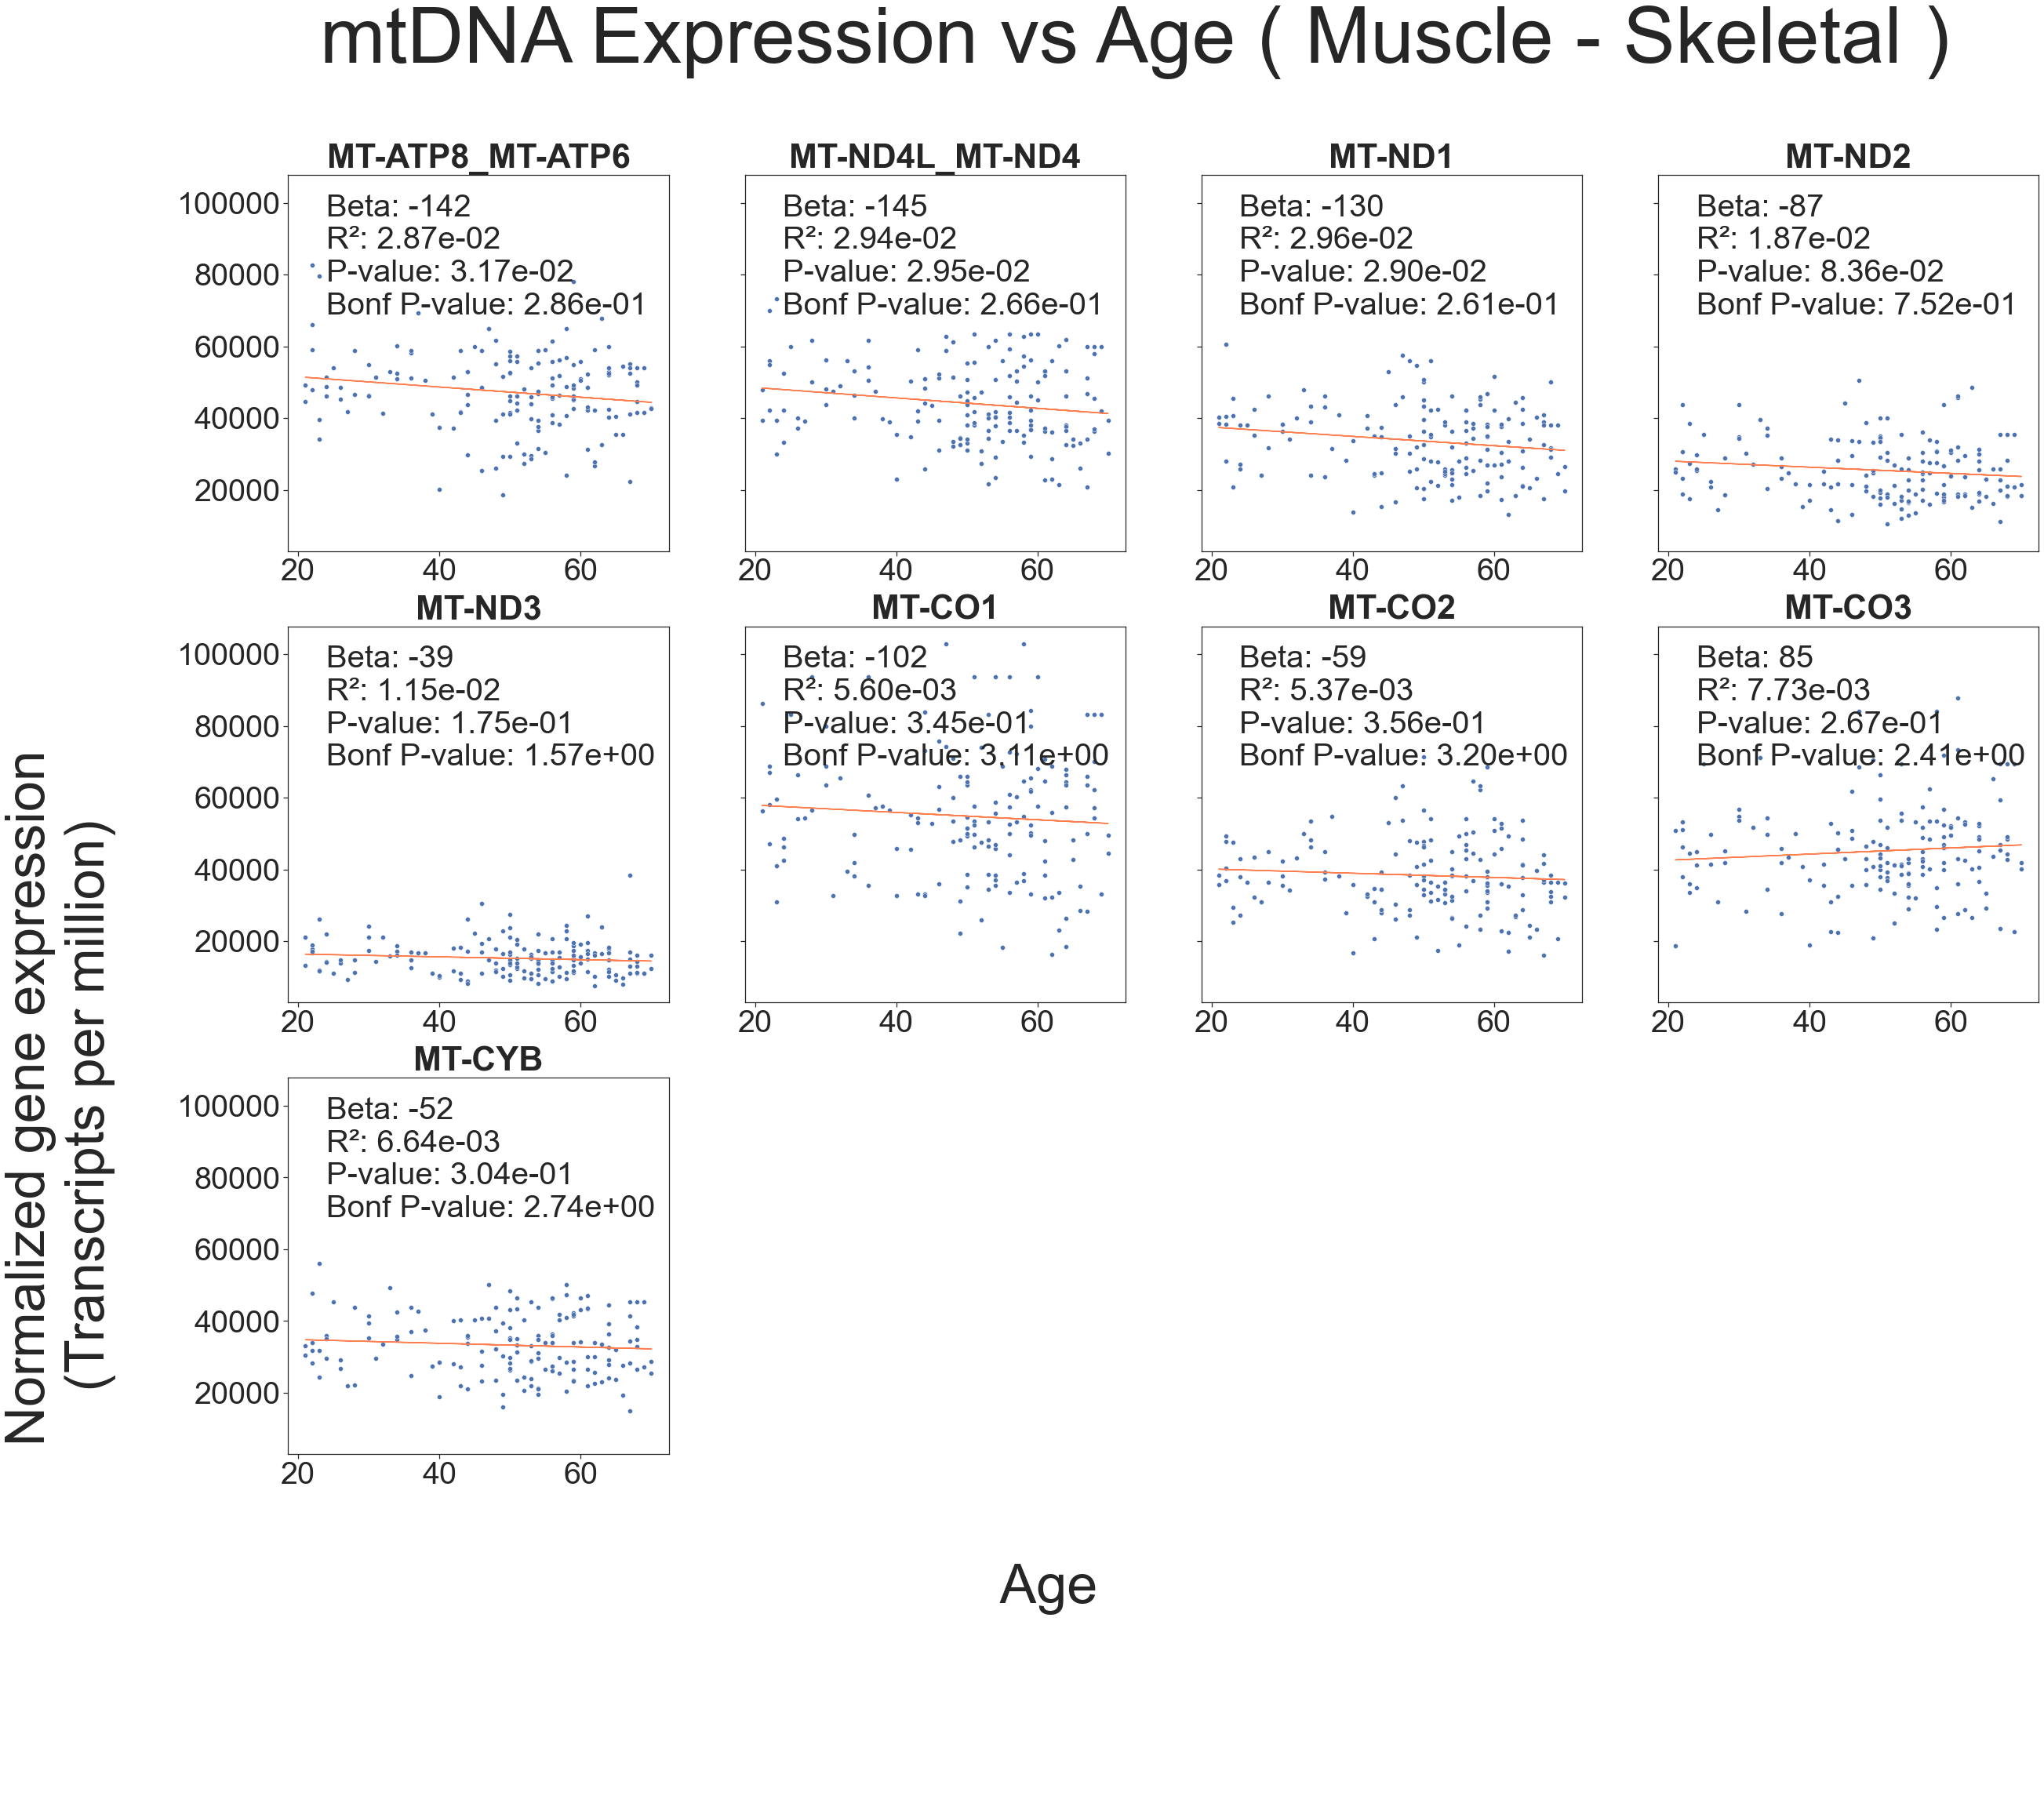

,Gene,Beta,R-squared,P-value,Bonferroni p-value
0,MT-ATP8_MT-ATP6,-142.212513,0.02868,0.031733,0.2856
1,MT-ND4L_MT-ND4,-145.055559,0.02944,0.029540,0.26586
2,MT-ND1,-129.543615,0.02965,0.028950,0.26055
3,MT-ND2,-86.520258,0.01871,0.083601,0.75241
4,MT-ND3,-39.336076,0.01154,0.174957,1.57461
5,MT-CO1,-102.231296,0.0056,0.345427,3.10884
6,MT-CO2,-59.004500,0.00537,0.355643,3.20079
7,MT-CO3,85.265176,0.00773,0.267439,2.40695
8,MT-CYB,-51.955435,0.00664,0.304307,2.73876


In [129]:
subplot_expr_phen(df_bicistronic_info_phen,'Muscle - Skeletal',list_mt_bicistronic,'Age')

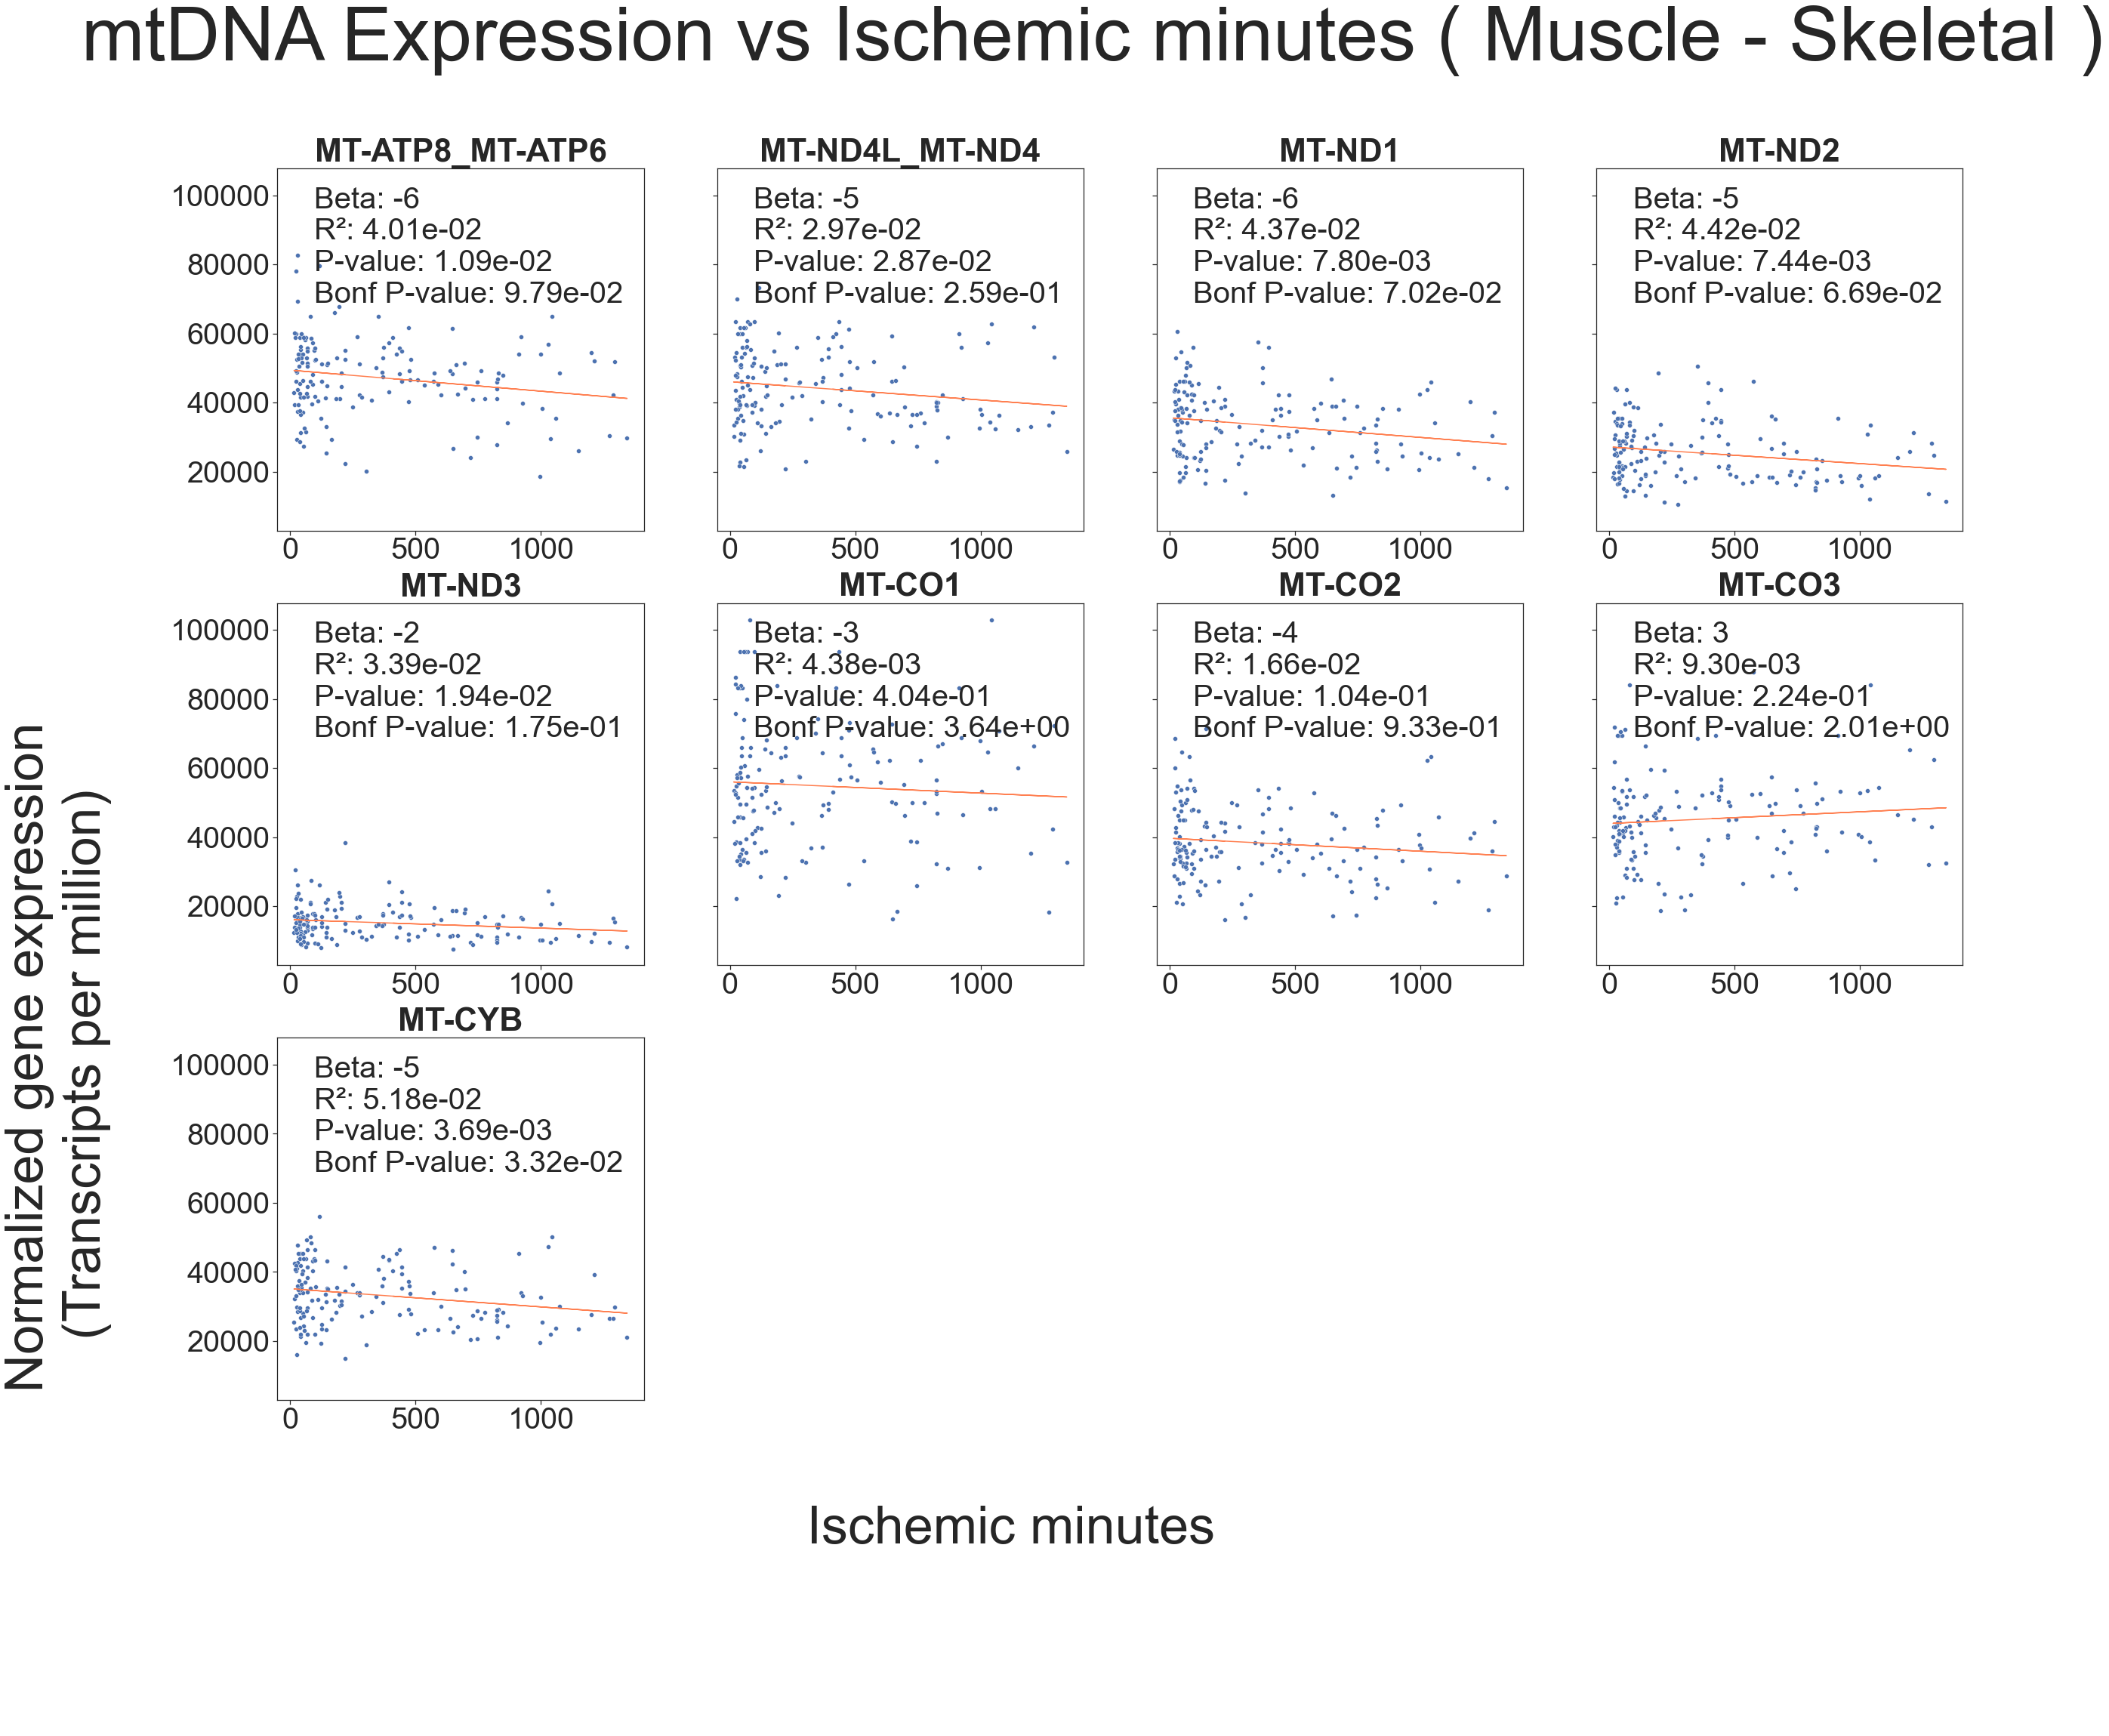

,Gene,Beta,R-squared,P-value,Bonferroni p-value
0,MT-ATP8_MT-ATP6,-6.088037,0.04009,0.010877,0.09789
1,MT-ND4L_MT-ND4,-5.278818,0.02973,0.028723,0.2585
2,MT-ND1,-5.693062,0.04367,0.007804,0.07023
3,MT-ND2,-4.815114,0.04419,0.007437,0.06693
4,MT-ND3,-2.439978,0.03387,0.019445,0.175
5,MT-CO1,-3.274314,0.00438,0.404123,3.63711
6,MT-CO2,-3.753178,0.01657,0.103695,0.93326
7,MT-CO3,3.386383,0.0093,0.223672,2.01304
8,MT-CYB,-5.255828,0.05179,0.003694,0.03324


In [130]:
subplot_expr_phen(df_bicistronic_info_phen,'Muscle - Skeletal',list_mt_bicistronic,'Ischemic minutes')

In [163]:
list_tissues = ['Muscle (skeletal)']

# Test categorical confounders for each gene.
def test_expr_categ(df,list_tissues,list_genes,phen):
    # Test results for each gene.
    out_list=[]
    for tissue in list_tissues:
        for gene in list_genes:
            # Filter data.
            data = df[(df['Tissue']==tissue)&(df['Gene']==gene)]
            # Alternate tissue names.
            ##dict_altTiss = {'Esophagus - Muscularis':'Smooth muscle (esophagus)','Muscle - Skeletal':'Muscle (skeletal)','Heart - Left Ventricle':'Heart (ventricle)','Artery - Tibial':'Artery (Tibial)','Whole Blood':'Whole blood','Heart - Atrial Appendage':'Heart (atrium)','Nerve - Tibial':'Nerve (Tibial)'}
            ##data['Tissue'] = [ dict_altTiss[row] for row in data['Tissue'] ]
            ##tissue_alt = dict_altTiss[tissue]
            # Decide test to use based on whether the phenotype is binary or not.
            if data[phen].drop_duplicates().shape[0] > 2:
                # Kruskal-Wallis test.
                stat,pvalue = stats.kruskal(data['TPM'].tolist(),data[phen].tolist())
                bonf_pvalue = pvalue*len(list_genes)
                out_list.append([phen+' and gene expression',tissue,gene,stat,pvalue,bonf_pvalue])
            elif data[phen].drop_duplicates().shape[0] == 2:
                # Mood's median test.
                phen_A = data[phen].drop_duplicates().tolist()[0]
                phen_B = data[phen].drop_duplicates().tolist()[1]
                mood = stats.median_test(data[data[phen]==phen_A]['TPM'],data[data[phen]==phen_B]['TPM'])
                bonf_pvalue = mood[1]*len(list_genes)
                # Bonferroni correction.
                if bonf_pvalue > 1:
                    bonf_pvalue = 1
                out_list.append([phen+' and gene expression',tissue,gene,mood[0],mood[1],bonf_pvalue,mood[2],mood[3]])
                # Results.
                #return( pd.DataFrame([[ mood[0],mood[1],mood[2],mood[3] ]], columns=["Mood's median test statistic","P-value","Grand median","Contingency table"]) )

    if data[phen].drop_duplicates().shape[0] > 2:
        return(pd.DataFrame(out_list, columns=['Comparison','Tissue','Gene','Kruskal-Wallis statistic','P-value','Bonferroni p-value']))
    elif data[phen].drop_duplicates().shape[0] == 2:
        return( pd.DataFrame(out_list, columns=["Comparison","Tissue","Gene","Mood's median test statistic","P-value",'Bonferroni p-value',"Grand median","Contingency table"]) )




# Filter test results by p-value.
test_expr_categ = test_expr_categ(df_bicistronic_info_phen,list_tissues,list_mt_bicistronic,'Sex')
test_expr_categ

,Comparison,Tissue,Gene,Mood's median test statistic,P-value,Bonferroni p-value,Grand median,Contingency table
0,Sex and gene expression,Muscle (skeletal),MT-ATP8_MT-ATP6,0.010456,0.918555,1,47983.843259,"[[29, 51], [31, 50]]"
1,Sex and gene expression,Muscle (skeletal),MT-ND4L_MT-ND4,0.050061,0.822957,1,42314.902776,"[[31, 49], [29, 52]]"
2,Sex and gene expression,Muscle (skeletal),MT-ND1,1.166936,0.280032,1,34285.248447,"[[26, 54], [34, 47]]"
3,Sex and gene expression,Muscle (skeletal),MT-ND2,0.302216,0.582496,1,24811.070405,"[[32, 48], [28, 53]]"
4,Sex and gene expression,Muscle (skeletal),MT-ND3,0.094132,0.758988,1,14823.557994,"[[28, 51], [32, 50]]"
5,Sex and gene expression,Muscle (skeletal),MT-CO1,0.050061,0.822957,1,54093.851844,"[[31, 49], [29, 52]]"
6,Sex and gene expression,Muscle (skeletal),MT-CO2,0.568893,0.450699,1,36893.314759,"[[27, 53], [33, 48]]"
7,Sex and gene expression,Muscle (skeletal),MT-CO3,0.000000,1.000000,1,43507.873600,"[[30, 50], [30, 51]]"
8,Sex and gene expression,Muscle (skeletal),MT-CYB,0.010456,0.918555,1,33382.495892,"[[29, 51], [31, 50]]"


## Correlate bicistronic transcript to single genes.

def test(df):
    data = df[df['Gene'].isin(['MT-ATP8_MT-ATP6','MT-ND4L_MT-ND4','MT-ATP8','MT-ATP6','MT-ND4L','MT-ND4'])].iloc[:,:-1]
    data = data[['Description','Gene','value']].pivot(index='Description', columns='Gene')
    #return( data )
    sns.scatterplot( data=data['value'] ,
                    x='MT-ATP8_MT-ATP6' , 
                    y='MT-ATP8' )
    sns.scatterplot( data=data['value'] ,
                    x='MT-ATP8_MT-ATP6' , 
                    y='MT-ATP6' )
    plt.show()
    
    sns.scatterplot( data=data['value'] ,
                    x='MT-ND4L_MT-ND4' , 
                    y='MT-ND4L' )
    sns.scatterplot( data=data['value'] ,
                    x='MT-ND4L_MT-ND4' , 
                    y='MT-ND4' )
    plt.show()
    
test(df_merged)